### Importing stuff and loading dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import math

plt.style.use('ggplot')
df = pd.read_csv('data\\train.csv')

df.shape

(891, 12)

### Describing the dataframe

In [2]:
df.describe(include='all')

PassengerId    Survived      Pclass                          Name  \
count    891.000000  891.000000  891.000000                           891   
unique          NaN         NaN         NaN                           891   
top             NaN         NaN         NaN  Hegarty, Miss. Hanora "Nora"   
freq            NaN         NaN         NaN                             1   
mean     446.000000    0.383838    2.308642                           NaN   
std      257.353842    0.486592    0.836071                           NaN   
min        1.000000    0.000000    1.000000                           NaN   
25%      223.500000    0.000000    2.000000                           NaN   
50%      446.000000    0.000000    3.000000                           NaN   
75%      668.500000    1.000000    3.000000                           NaN   
max      891.000000    1.000000    3.000000                           NaN   

         Sex         Age       SibSp       Parch  Ticket        Fare  \
count    891  714.000000  891.000000  891.000000     891  891.000000   
unique     2         NaN         NaN         NaN     681         NaN   
top     male         NaN         NaN         NaN  347082         NaN   
freq     577         NaN         NaN         NaN       7         NaN   
mean     NaN   29.699118    0.523008    0.381594     NaN   32.204208   
std      NaN   14.526497    1.102743    0.806057     NaN   49.693429   
min      NaN    0.420000    0.000000    0.000000     NaN    0.000000   
25%      NaN   20.125000    0.000000    0.000000     NaN    7.910400   
50%      NaN   28.000000    0.000000    0.000000     NaN   14.454200   
75%      NaN   38.000000    1.000000    0.000000     NaN   31.000000   
max      NaN   80.000000    8.000000    6.000000     NaN  512.329200   

              Cabin Embarked  
count           204      889  
unique          147        3  
top     C23 C25 C27        S  
freq              4      644  
mean            NaN      NaN  
std             NaN      NaN  
min             NaN      NaN  
25%             NaN      NaN  
50%             NaN      NaN  
75%             NaN      NaN  
max             NaN      NaN

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualising the dataframe

### Survivors based on sex

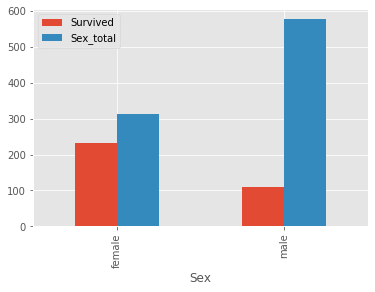

In [4]:
df_sex_survive = df[['Sex','Survived']].groupby('Sex').apply(sum)
df_sex_survive.join(df['Sex'].value_counts(),rsuffix='_total').plot(y=['Survived','Sex_total'],kind='bar')

### Survivors by age

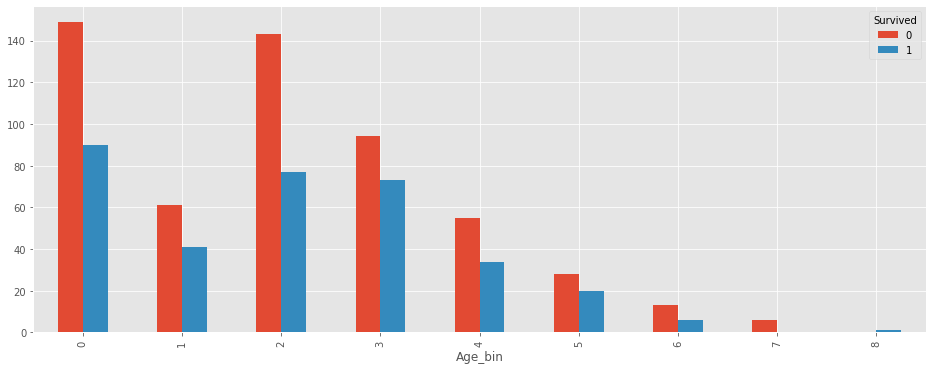

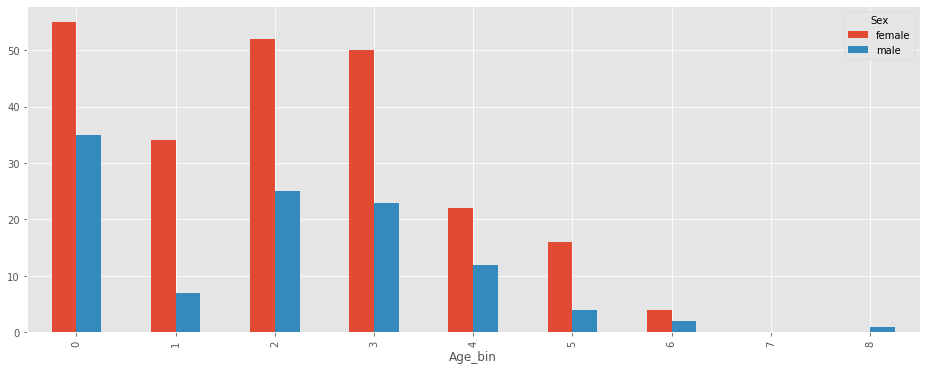

In [5]:
df2 = df.copy()
df2.fillna(0,inplace=True)
df2['Age_bin'] = (df2['Age']/10).apply(math.floor)
df2['Count'] = 1
df2[['Age_bin','Survived','Count']].pivot_table(values='Count',index='Age_bin',columns='Survived',aggfunc='sum').plot(kind='bar',figsize=(16,6))
df2[['Age_bin','Sex','Survived']].pivot_table(values='Survived',index='Age_bin',columns='Sex',aggfunc='sum').plot(kind='bar',figsize=(16,6))


### Survivors by ticket class

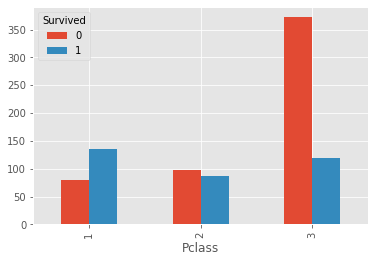

In [6]:
df[['Pclass','Survived','PassengerId']].pivot_table(values='PassengerId',index='Pclass',columns='Survived',aggfunc='count').plot(kind='bar')

### Sibling+spouse vis

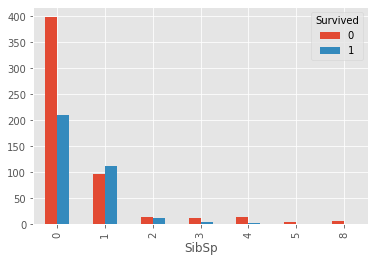

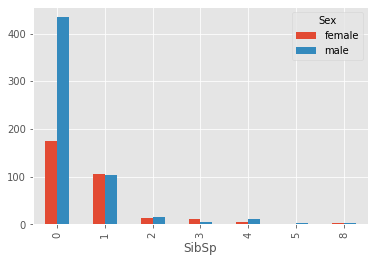

In [7]:
df[['SibSp','Survived','PassengerId']].pivot_table(values='PassengerId',index='SibSp',columns='Survived',aggfunc='count').plot(kind='bar')
df[['SibSp','Sex','Survived']].pivot_table(values='Survived',index='SibSp',columns='Sex',aggfunc='count').plot(kind='bar')

### Parent + children

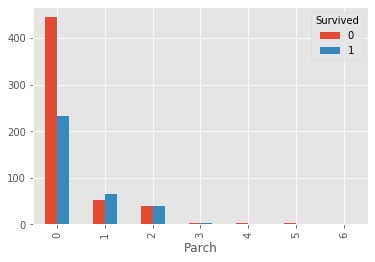

In [8]:
df[['Parch','Survived','PassengerId']].pivot_table(values='PassengerId',index='Parch',columns='Survived',aggfunc='count').plot(kind='bar')

## Feature engineering

In [9]:
df['Family_size'] = df['Parch'] + df['SibSp']
df['Fare_per_person'] = df['Fare']/(df['Family_size']+1)

df['Count'] = 1  # For visualising purposes

In [10]:
def extract_deck(ticket:str):
    if type(ticket) is not str:
        return None
    out = []
    for char in ticket:
        if char.isalpha():
            out.append(char)
    try:
        return out[0]
    except IndexError:
        return None

df['Deck'] = df['Ticket'].apply(extract_deck)
df['Deck'].value_counts()

S    65
P    65
C    47
A    29
W    13
F     7
L     4
Name: Deck, dtype: int64

In [11]:
def extract_title(name:str):
    comma = name.find(',')
    dot = name.find('.',comma)
    return name[comma+2:dot]

df['Title'] = df['Name'].apply(extract_title)
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Mme               1
Capt              1
Jonkheer          1
Lady              1
Sir               1
Ms                1
the Countess      1
Name: Title, dtype: int64

Survived   0   1       Pct
Deck                      
P         23  42  0.646154
F          3   4  0.571429
C         31  16  0.340426
S         44  21  0.323077
L          3   1  0.250000
W         11   2  0.153846
A         27   2  0.068966

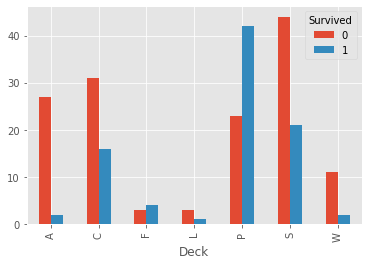

In [25]:
pivot_deck = df[['Deck','Survived','Count']].pivot_table(values='Count',index='Deck',columns='Survived',aggfunc='sum')
pivot_deck.plot(kind='bar')
pivot_deck['Pct'] = pivot_deck[1]/(pivot_deck[0]+pivot_deck[1])
pivot_deck.sort_values('Pct',ascending=False)

In [28]:
pivot_title = df[['Title','Survived','Count']].pivot_table(values='Count',index='Title',columns='Survived',aggfunc='sum')
pivot_title.fillna(0,inplace=True)
pivot_title['Pct'] = pivot_title[1]/(pivot_title[0]+pivot_title[1])
pivot_title.sort_values('Pct',ascending=False)

Survived          0      1       Pct
Title                               
the Countess    0.0    1.0  1.000000
Mlle            0.0    2.0  1.000000
Sir             0.0    1.0  1.000000
Ms              0.0    1.0  1.000000
Lady            0.0    1.0  1.000000
Mme             0.0    1.0  1.000000
Mrs            26.0   99.0  0.792000
Miss           55.0  127.0  0.697802
Master         17.0   23.0  0.575000
Col             1.0    1.0  0.500000
Major           1.0    1.0  0.500000
Dr              4.0    3.0  0.428571
Mr            436.0   81.0  0.156673
Jonkheer        1.0    0.0  0.000000
Rev             6.0    0.0  0.000000
Don             1.0    0.0  0.000000
Capt            1.0    0.0  0.000000

In [ ]:
def process_dataframe(dataframe):
    #TODO
    pass